 ## Project Description: Determine the factors that influenced the price of vehicles

### Tables Of Contents <a class="anchor" id="table_of_contents"></a>

* [Step 1- Preprocessing ](#Step_1)
* [Step 2- Shortest/Longest listed days ](#Step_2)
* [Step 3- Number of days ads distribution- Median and Average ](#Step_3)
* [Step 4- Distribution of the days listed, price, age, odometer, cylinders and condition factors ](#Step_4)
* [Step 5- Outliers ](#Step_5)
* [Step 6- Review of data without outlier ](#Step_6)
* [Step 7- Review of models with shortest/longest listing days ](#Step_7)
* [Step 8- Factors impact the car price ](#Step_8)
* [Step 9- Conclustions ](#Step_9)





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\VBA\Data Analyst\EDA/vehicles_us.csv')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [3]:
df[df.duplicated()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


- No duplicate rows

### Step 1:Preprocessing <a class="anchor" id="Step_1"></a>

[Go back to the Table of Contents](#table_of_contents)

In [4]:
for c in df.columns:
    print (c)

price
model_year
model
condition
cylinders
fuel
odometer
transmission
type
paint_color
is_4wd
date_posted
days_listed


### Review column data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


- From the above we may note that days_listed coloumn data type should be changed to date type

### Missing values

In [6]:
missing_perc = df.isnull().sum() /len(df)*100
missing_perc=missing_perc[missing_perc>0]
print('percentage of missing values per columns')
missing_perc

percentage of missing values per columns


model_year      7.023775
cylinders      10.208637
odometer       15.316836
paint_color    17.985444
is_4wd         50.369723
dtype: float64

- Missing values - is_4wd

In [7]:
df.is_4wd.unique()

array([ 1., nan])

###### Lets fill missing values in a boolean column with 0 for non-4wd cars:

In [8]:
df['is_4wd'].fillna(0,inplace=True)

###### Lets replace with zero the coloumns: cylinders, odometer

In [9]:
df['cylinders'].fillna(0, inplace=True)
df['odometer'].fillna(0, inplace=True)

###### Lets replace the missing values in the model_year column with the median model year per each car model

In [10]:
median_model_year= df[~df['model_year'].isna()].groupby('model').agg({'model_year':[ 'median']})
median_model_year


,model_year
,median
model,
acura tl,2007.0
bmw x5,2010.0
buick enclave,2012.0
cadillac escalade,2009.0
chevrolet camaro,2013.0
...,...
toyota sienna,2008.0
toyota tacoma,2010.0


In [11]:
df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'),inplace=True)

In [12]:
len(df[df['model_year'].isna()]['model'].unique())

0

In [13]:
missing_perc = df.isnull().sum() /len(df)*100
missing_perc=missing_perc[missing_perc>0]
print('percentage of missing values per columns')
missing_perc

percentage of missing values per columns


paint_color    17.985444
dtype: float64

In [14]:
n_models= len(df.model.unique())

print('Number of car models',n_models)

Number of car models 100


In [15]:
print('Time period covered in the dataset',df.date_posted.min(),df.date_posted.max(), sep= "  ")

Time period covered in the dataset  2018-05-01  2019-04-19


### Step 2: Shortest/Longest listed days <a class="anchor" id="Step_2"></a>

[Go back to the Table of Contents](#table_of_contents)

- Which models are listed for the shortes period:

In [16]:
avg_days_listed_models= df.pivot_table(index='model', values='days_listed', aggfunc={'days_listed':'median'}).reset_index().sort_values(by='days_listed',ascending=True)
avg_days_listed_models.head()

,model,days_listed
39,ford f250,30.0
61,honda pilot,30.0
33,ford f-250,30.0
99,volkswagen passat,31.0
58,honda civic lx,31.0


###### Below we can see the models which take the longest to sale

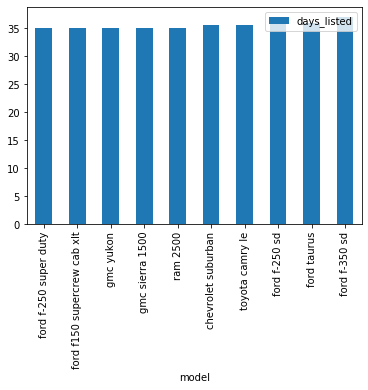

In [17]:
avg_days_listed_models[90:].plot(kind='bar',x='model');

### Step 3: Number of days ads distribution- Median and Average <a class="anchor" id="Step_3"></a>

[Go back to the Table of Contents](#table_of_contents)

In [18]:
median_days_listed_models= df.pivot_table(index='model', values='days_listed',aggfunc=[np.mean,np.median] ).reset_index()
median_days_listed_models.columns =['model','average_d','median_d']
median_days_listed_models.sort_values(by=['average_d','median_d'])
# .reset_index().sort_values(by='days_listed',ascending=True)
median_days_listed_models.tail()

,model,average_d,median_d
95,toyota sienna,39.185410,33.0
96,toyota tacoma,38.773881,33.0
97,toyota tundra,38.558872,32.0
98,volkswagen jetta,39.892100,32.0
99,volkswagen passat,37.414286,31.0


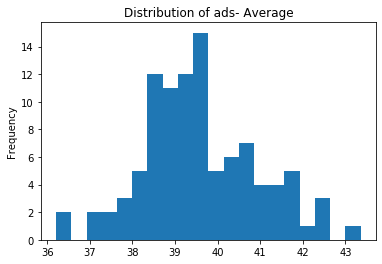

In [19]:
median_days_listed_models['average_d'].plot(kind='hist',x='model', title='Distribution of ads- Average', bins=20);

# add axis labels

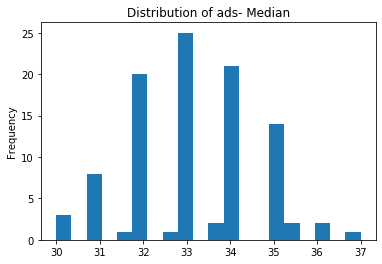

In [20]:
median_days_listed_models['median_d'].plot(kind='hist',x='model', title='Distribution of ads- Median', bins=20);

- From the above we may see that most adds are listed between 33-34 days

- We'll change the date column into a date datatype

In [21]:
df['date_posted']=pd.to_datetime(df['date_posted'],format='%Y-%m-%d')
df['year']=pd.DatetimeIndex(df['date_posted']).year
df['year_dt'] = df['date_posted'].dt.year

df['month']=pd.DatetimeIndex(df['date_posted']).month
df['month_dt'] = df['date_posted'].dt.month_name()

df['day']=pd.DatetimeIndex(df['date_posted']).day
df['day_dt'] = df['date_posted'].dt.day_name()

- Calculate of average year mileage:

In [22]:
df['age']= df['year']-df['model_year']
df['avg_mile_per_year'] =df['odometer']/ df['age']

In [23]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,year,year_dt,month,month_dt,day,day_dt,age,avg_mile_per_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,2018-06-23,19,2018,2018,6,June,23,Saturday,7.0,20714.285714
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,2018,2018,10,October,19,Friday,7.0,12672.142857
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,2019,2019,2,February,7,Thursday,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,0.0,automatic,pickup,NaN,...,2019-03-22,9,2019,2019,3,March,22,Friday,16.0,0.000000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,2019,2019,4,April,2,Tuesday,2.0,40451.500000


- Update the condition column into number category

In [24]:
df['condition'] =df['condition'].apply(lambda x: 5 if 
                                       x=='new' else (4 if x=='like new' else 
                                                                     (3 if x=='excellent' else(
                                                                         2 if x=='good' else(1 if x=='fair' 
                                                                                             else(0 if x=='salvage' else 'check'))))))

### Step 4: Distribution of the days listed, price, age, odometer, cylinders and condition factors <a class="anchor" id="Step_4"></a>

[Go back to the Table of Contents](#table_of_contents)

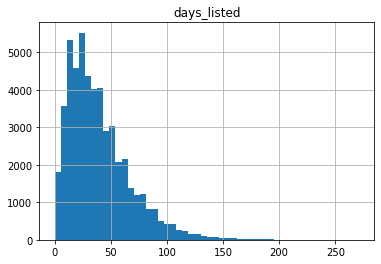

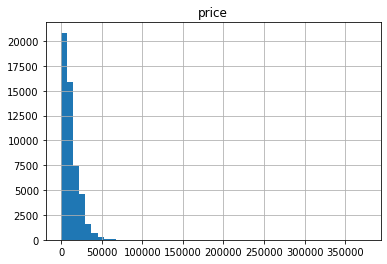

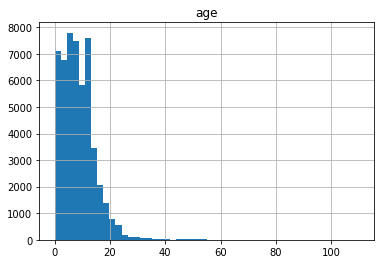

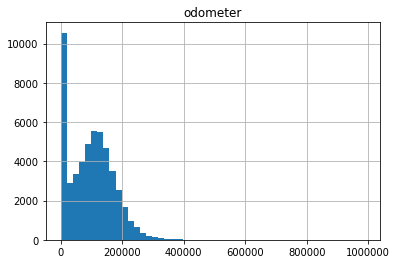

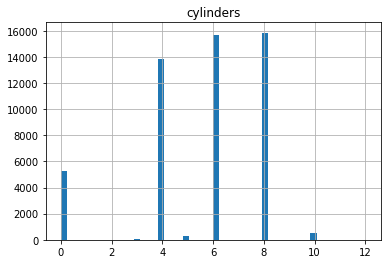

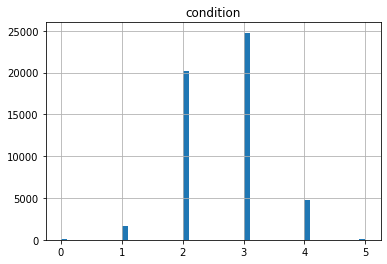

In [25]:
histdata= df[['days_listed','price','age','odometer','cylinders','condition']]

for c in histdata.columns:
    df.hist(c, bins=50, range=(0,max(histdata[c])))

 Most cars prices are up to to 25,000
 Age of most sold cars is in the rage of 1 to 15 years
 most sold car have about 150000 km with 6 or 8 cylinders in a good or excellent condition.

### Step 5: Outliers <a class="anchor" id="Step_5"></a>

[Go back to the Table of Contents](#table_of_contents)

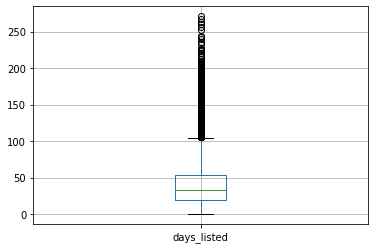

In [26]:
df.boxplot('days_listed')

Ads listed more than 105 days (approximetly) are outliers - lets remove them

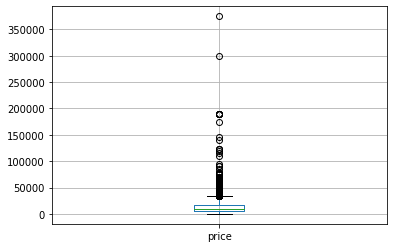

In [27]:
df.boxplot('price')


In [28]:
df[df['price']>50000].shape

(227, 21)

In [29]:
df[df['price']>50000].shape[0]/df.shape[0]*100

0.44056283357593407

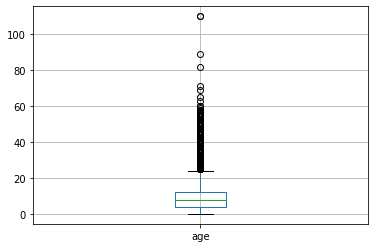

In [30]:
df.boxplot('age');

In [31]:
df[df['age']>25].shape[0]/df.shape[0]*100

1.2382338670548279

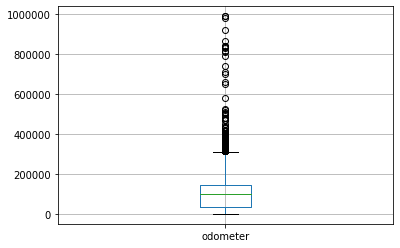

In [32]:
df.boxplot('odometer');

In [33]:
df[df['odometer']>300000].shape[0]/df.shape[0]*100

0.557011159631247

- We may notice to the following outliers:
    1. ads with price over 40, 000 (0.44%)
    2. ads with car age over 25 (1.2%)
    3. ads with car odometer over 30000 (0.55%)

-As the amout of outliers is not significant we will remove them

### Step 6: Review of data without outliers <a class="anchor" id="Step_6"></a>

[Go back to the Table of Contents](#table_of_contents)

In [34]:
n_df = df[(df['days_listed']<100) & (df['price']<50000) & (df['odometer'] < 300000) & (df['age']<=25)]


In [35]:
print('Percentage of data removed: ', (df.shape[0]-n_df.shape[0])/n_df.shape[0]*100)

Percentage of data removed:  6.498418800768897


In [36]:
histdata= n_df[['days_listed','price','age','odometer','cylinders','condition']]

for c in histdata.columns:
    print('Average',c,histdata[c].mean())
    print('Median',c,histdata[c].median())

Average days_listed 36.11146937847502
Median days_listed 32.0
Average price 11959.219652342861
Median price 9000.0
Average age 8.156859097579629
Median age 7.0
Average odometer 96577.51741386081
Median odometer 99014.0
Average cylinders 5.477315475083194
Median cylinders 6.0
Average condition 2.642338934705773
Median condition 3.0


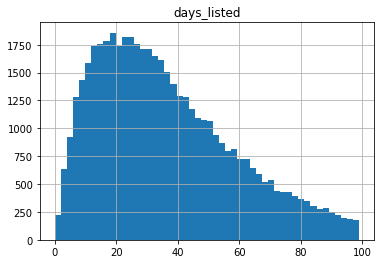

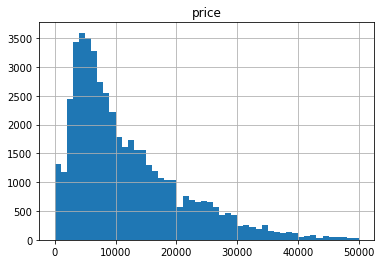

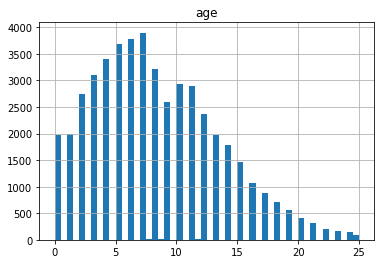

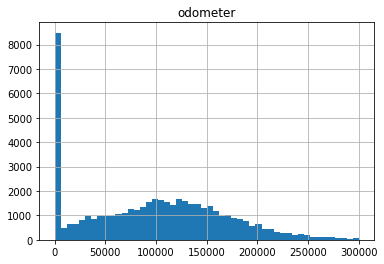

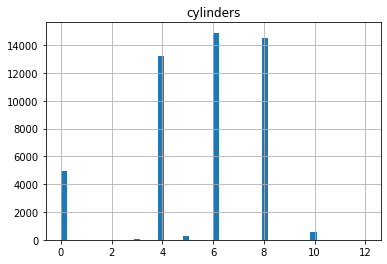

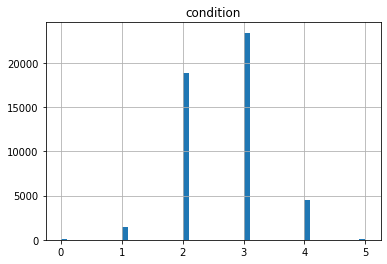

In [37]:
histdata= n_df[['days_listed','price','age','odometer','cylinders','condition']]

for c in histdata.columns:
    n_df.hist(c, bins=50, range=(0,max(histdata[c])))
    

### Updated Dataset:

1.Most ads are listed between 10 to 25 days

2.Most car prices are around 9,000

- Lets review days listed outliers after removing previous outliers

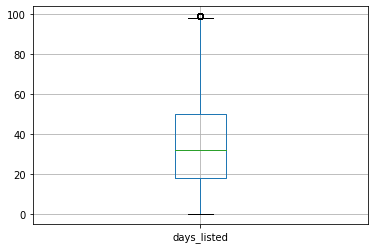

In [38]:
n_df.boxplot('days_listed')

### Step 7: Review of models with shortest/longest listing days <a class="anchor" id="Step_7"></a>

[Go back to the Table of Contents](#table_of_contents)

In [39]:
# n_df.groupby('model')['days_listed'].mean()
df_model=n_df.groupby('model').agg({'days_listed':['mean','count'],'price':'mean'}).reset_index()
df_model.columns = ['model','avg_days','num_ads','average_price']
df_model

,model,avg_days,num_ads,average_price
0,acura tl,36.533333,225,6482.720000
1,bmw x5,37.607143,252,10530.738095
2,buick enclave,36.454198,262,11518.538168
3,cadillac escalade,36.918089,293,15322.368601
4,chevrolet camaro,35.192935,368,12142.442935
...,...,...,...,...
95,toyota sienna,35.435897,312,8564.798077
96,toyota tacoma,36.269182,795,15709.329560
97,toyota tundra,36.006908,579,14593.158895
98,volkswagen jetta,35.707071,495,6440.533333


In [41]:
print('Average days advertisment is listed until removed: ', round(df_model['avg_days'].mean(),2))

Average days advertisment is listed until removed:  36.13


In [42]:
df_model= df_model.sort_values(by='avg_days',ascending=True)
df_model

,model,avg_days,num_ads,average_price
39,ford f250,32.864516,310,17205.254839
28,ford edge,34.085165,364,11819.510989
23,chrysler town & country,34.162879,264,7449.215909
33,ford f-250,34.241477,352,15033.946023
78,nissan murano,34.292793,222,7418.261261
...,...,...,...,...
17,chevrolet suburban,38.253493,501,14206.151697
38,ford f150 supercrew cab xlt,38.348101,316,24832.493671
90,toyota camry le,38.468852,305,5862.209836
73,mercedes-benz benze sprinter 2500,38.560976,41,34900.000000


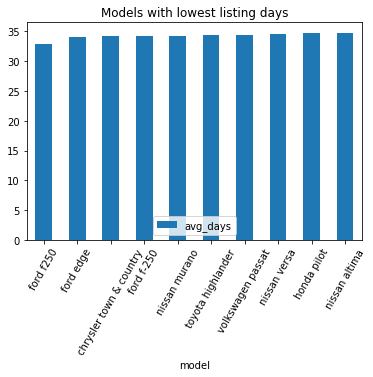

In [43]:
df_model[:10].sort_values(by='avg_days', ascending=True).plot('model','avg_days',kind='bar', title='Models with lowest listing days')

plt.xticks(rotation=60, horizontalalignment="center");

- Ford f250 is the is the model with the shortest listing days.

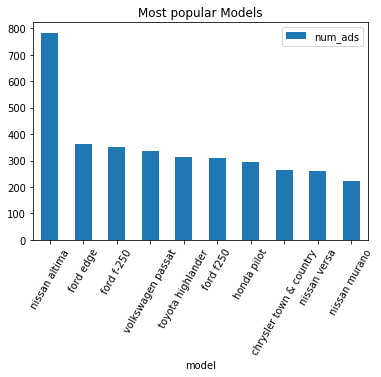

In [44]:
df_model[:10].sort_values(by='num_ads', ascending=False).plot('model','num_ads',kind='bar', title='Most popular Models')

plt.xticks(rotation=60, horizontalalignment="center");

Nissan Altima and Ford edge have the highest ad listings

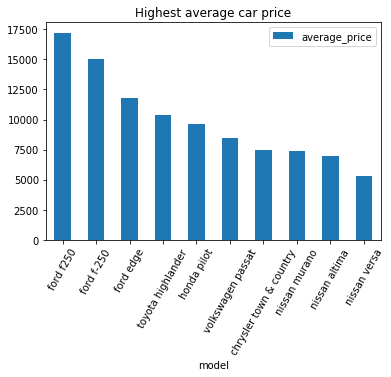

In [45]:
df_model[:10].sort_values(by='average_price', ascending=False).plot('model','average_price',kind='bar', title='Highest average car price')

plt.xticks(rotation=60, horizontalalignment="center");

### Step 7: Factors impact the car price <a class="anchor" id="Step_7"></a>

[Go back to the Table of Contents](#table_of_contents)

In [62]:
corr= n_df[['price','model_year','odometer','days_listed']]
corr.head()

,price,model_year,odometer,days_listed
1,25500,2011.0,88705.0,50
2,5500,2013.0,110000.0,79
4,14900,2017.0,80903.0,28
5,14990,2014.0,57954.0,15
6,12990,2015.0,79212.0,73
...,...,...,...,...
51518,3750,2005.0,110200.0,63
51520,9249,2013.0,88136.0,37
51521,2700,2002.0,181500.0,22
51522,3950,2009.0,128000.0,32


In [65]:
corr.corr()

,price,model_year,odometer,days_listed
price,1.000000,0.529630,-0.339937,0.002768
model_year,0.529630,1.000000,-0.426876,0.002629
odometer,-0.339937,-0.426876,1.000000,0.007276
days_listed,0.002768,0.002629,0.007276,1.000000


From the correlation matrix we can note that the strongest correlation is between price and model year

### Model year - Price

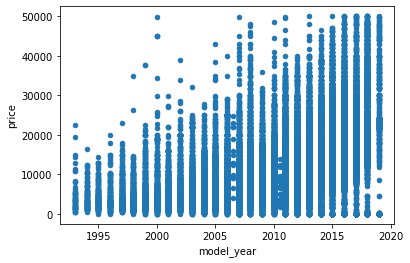

In [46]:
 n_df.plot(x= 'model_year',y='price',kind='scatter');

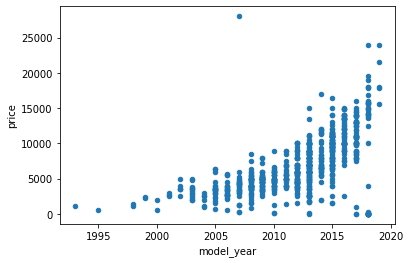

In [49]:
df[df['model']=='nissan altima'].plot(x= 'model_year',y='price',kind='scatter')


- We can see that the model year has effect to the casr price (for all models and the most popular sold model (Nissan Altima))

### Mileage - Price

- Lets remove the 0 milegat since we filled all nans with 0 previously

C:\Users\ilotv\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


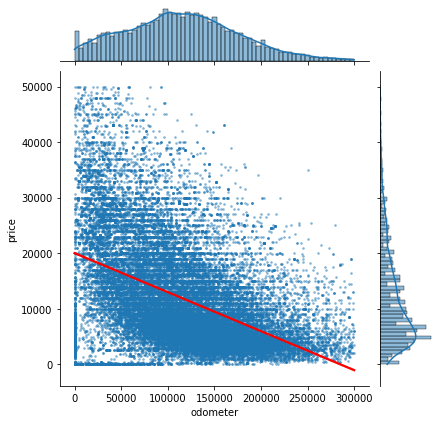

In [50]:
sns.jointplot(n_df[n_df['odometer']!=0].odometer,
              n_df['price'],
              kind='reg',
              scatter_kws={'alpha': 0.4, 's': 3},
              line_kws={'color': 'r'});

- We can see that the the price range decrese alonge with increse in the car's mileage.

### Transmission Type - Price

In [52]:
# transmission
df.transmission.unique()

array(['automatic', 'manual', 'other'], dtype=object)

Text(0.5, 0.98, 'Transmission vs Prices')

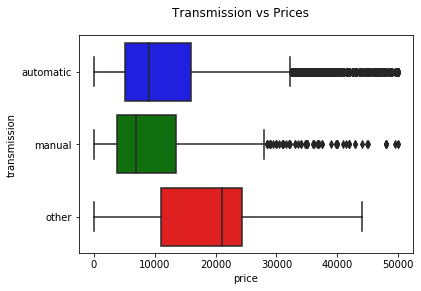

In [53]:
# https://medium.com/analytics-vidhya/tutorial-exploratory-data-analysis-eda-with-categorical-variables-6a569a3aea55
fig, ax = plt.subplots()

sns.boxplot(x="price", y="transmission", data=n_df,
            orient="h", palette={'automatic':"blue", 'manual':"green",'other':'red'}, ax=ax)

ax.get_yaxis().set_visible(True)

fig.suptitle("Transmission vs Prices")

# color_patches = [
#     Patch(facecolor="blue", label="survived"),
#     Patch(facecolor="green", label="did not survive")
# ]
# ax.legend(handles=color_patches);

- We may see that case with automatic transmission have higher prices than manual cars

### Color - Price

For the colors analysis, lets remove the Nans

In [54]:
color_df= n_df
color_df.dropna(subset=['paint_color'],inplace=True)


C:\Users\ilotv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


''

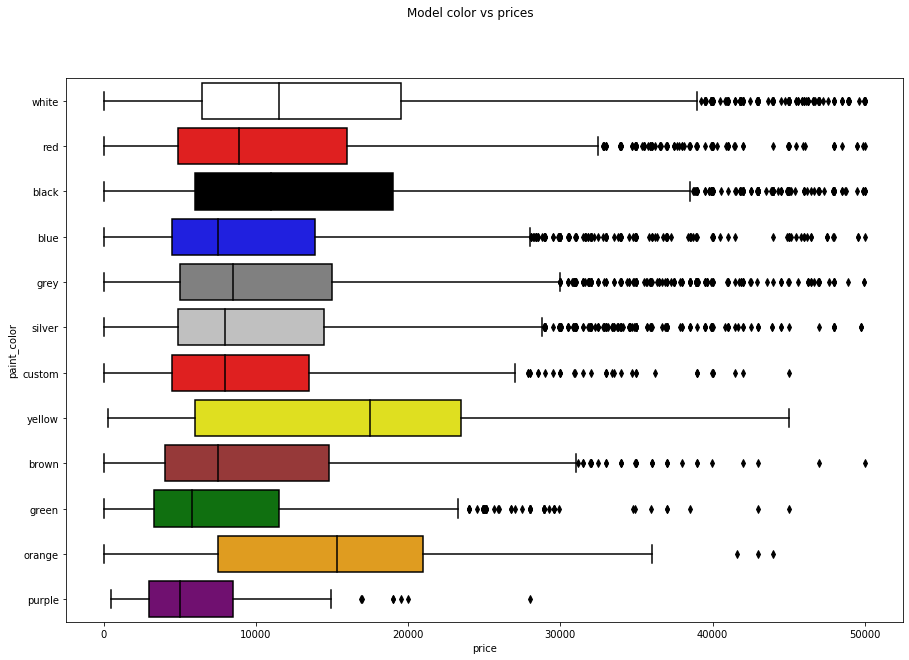

In [55]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(x="price", y="paint_color",
            data=color_df, orient="h",
            palette= {'white':'white', 'red':'red',
                      'black':'black', 'blue':'blue',
                      'grey':'grey', 'silver':'silver',
                      'custom':'red', 'yellow':'yellow',
                      'brown':'brown', 'green':'green',
                      'orange':'orange',
                      'purple':'purple'} ,ax=ax)

ax.get_yaxis().set_visible(True)

fig.suptitle("Model color vs prices")
;

- We may see that Yellow White and Orange colors cars are being sold at the highest prices, while purple, green and brown are among the colors with the lowest prices

### Overall Conclusion--



***The data covers a period between May 2018 through April 2019 Of 100 car  models***

***The models which had the longest listing days were :***
- Ford f 250
- Ford Edge
- Nissan Murano
 -Toyota highlander

***The models with the longest listing time:***
* Ford f-350 sd
* Ford taurus
* Ford f 250 sd
* Toyota camry le
* Chevrolet suburban


***Most of ads are listed between 39 to 40 days  while on average most ads listed 33 days - the difference relates to outliers of listed days***


- Most car prices are around 10-15 K
- Most car’s age are between 10 to 15 with a mileage of 170-180K
- Most car sold have 6 or 8 cylinders and good or excellent condition
- We have removed outliers rows subject to the below conditions:
- We have removed outlier days which had more than 100 days. 
- We have removed price outlierst of over 40,000 ,mileage over 30,000 and age over 25 years

***As a result of outliers removal:***

- Average listed days is 36 with medina of 32 days
- Average car price is 11960 with median of 9000
- Cars average age is 8
- Cars average odometer is 96600 with median of 99000
- Nissan Altima is the most popular model listed in the data.
- Ford f250 has on average the highest price

***Factors impact the car price:***

- 1. Car price increase when the model year is newer, the same applies for the most popular car- Nissan Altima
- 2. Odometer - We can see decrease in price along with increase in car’s mileage
- 3. Transmission - automatic cars have higher range of prices
- 4. Car color - White, black yellow and orange had the highest prices
